In [5]:
import numpy as np
import xml.etree.ElementTree as ET
import os.path as osp
import os
import json


def parse_rec(filename):
    """ Parse a PASCAL VOC xml file """
    tree = ET.parse(open(filename, encoding="utf-8"))
    ann={}
    width = tree.find("size").find("width").text
    height = tree.find("size").find("height").text
    ann["width"] = int(width)
    ann["height"] = int(height)
    objects = []
    for obj in tree.findall('object'):
        obj_struct = {}
        obj_struct['name'] = obj.find('name').text if obj.find('name') is not None else "nknown"
        obj_struct['pose'] = obj.find('pose').text if obj.find('pose') is not None else "nknown"
        obj_struct['truncated'] = int(obj.find('truncated').text) if obj.find('truncated') is not None else 0
        obj_struct['difficult'] = int(obj.find('difficult').text) if obj.find('difficult') is not None else 0
        bbox = obj.find('bndbox')
        obj_struct['bbox'] = [int(float(bbox.find('xmin').text)),
                              int(float(bbox.find('ymin').text)),
                              int(float(bbox.find('xmax').text)),
                              int(float(bbox.find('ymax').text))]
        objects.append(obj_struct)
    
    ann["objects"]=objects
    return ann

dataset_root = "/mnt/nfs/hangkongbei/voc-style"
trainval_set = osp.join(dataset_root, "ImageSets/Main/trainval.txt")
ann_dir = osp.join(dataset_root, "Annotations")
image_dir = osp.join(dataset_root, "JPEGImages")

with open(trainval_set) as f:
    trainval_ids = [file.strip() for file in f.readlines()]
    
xml_file = osp.join(ann_dir, trainval_ids[0]+".xml")
parse_rec(xml_file)




{'height': 1641,
 'objects': [{'bbox': [1, 79, 98, 155],
   'difficult': 0,
   'name': 'Vehicle',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [220, 97, 273, 134],
   'difficult': 0,
   'name': 'Vehicle',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [593, 2, 650, 34],
   'difficult': 0,
   'name': 'Vehicle',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [1, 439, 33, 494],
   'difficult': 0,
   'name': 'Vehicle',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [17, 450, 57, 509],
   'difficult': 0,
   'name': 'Vehicle',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [39, 457, 80, 518],
   'difficult': 0,
   'name': 'Vehicle',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [62, 477, 101, 531],
   'difficult': 0,
   'name': 'Vehicle',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [206, 551, 248, 602],
   'difficult': 0,
   'name': 'Vehicle',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [1, 584, 21, 635]

In [4]:
from tqdm import tqdm

anns=[]
for imageid in tqdm(trainval_ids):
    xml_file = osp.join(ann_dir, imageid+".xml")
    ann = parse_rec(xml_file)
    anns.append(ann)
anns[0]

{'height': 1641,
 'objects': [{'bbox': [1, 79, 98, 155],
   'difficult': 0,
   'name': 'Vehicle',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [220, 97, 273, 134],
   'difficult': 0,
   'name': 'Vehicle',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [593, 2, 650, 34],
   'difficult': 0,
   'name': 'Vehicle',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [1, 439, 33, 494],
   'difficult': 0,
   'name': 'Vehicle',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [17, 450, 57, 509],
   'difficult': 0,
   'name': 'Vehicle',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [39, 457, 80, 518],
   'difficult': 0,
   'name': 'Vehicle',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [62, 477, 101, 531],
   'difficult': 0,
   'name': 'Vehicle',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [206, 551, 248, 602],
   'difficult': 0,
   'name': 'Vehicle',
   'pose': 'Unspecified',
   'truncated': 0},
  {'bbox': [1, 584, 21, 635]

In [31]:
from tqdm import tqdm
from PIL import Image
import math

sizes = []

dataset_info_detail=[]
detail_info["total_car_count"]=[]
detail_info["total_car_size"]=[]
detail_info["car_size_fraction"]=[]
detail_info["car_size_average"]=[]

for i, ann in tqdm(enumerate(anns)):
    imageid = trainval_ids[i]
    image_file = osp.join(image_dir, imageid+".jpg")
    w, h = Image.open(image_file).size
    total_car_size = 0
    total_car_count = 0
    
    for obj in ann["objects"]:
        x1, y1, x2, y2 = obj['bbox']
        size = (x2-x1)*(y2-y1)
        sizes.append(size)
        
        total_car_count+=1
        total_car_size+=size
    
    car_size_fraction = total_car_size/(w*h)
    
    #detail_info = {}
    detail_info["total_car_count"].append(total_car_count)
    detail_info["total_car_size"].append(total_car_size)
    detail_info["car_size_fraction"].append(car_size_fraction)
    detail_info["car_size_average"].append(math.pow(total_car_size/total_car_count, 0.5))
    
    #dataset_info_detail.append(detail_info)

detail_info["total_car_count"] = np.array(detail_info["total_car_count"])
detail_info["total_car_size"] = np.array(detail_info["total_car_size"])
detail_info["car_size_fraction"] = np.array(detail_info["car_size_fraction"])
detail_info["car_size_average"] = np.array(detail_info["car_size_average"])

print(detail_info["total_car_count"][:6])
    
len(sizes)

4355it [00:04, 947.12it/s] 

[113   7  10  63 153 158]


171483

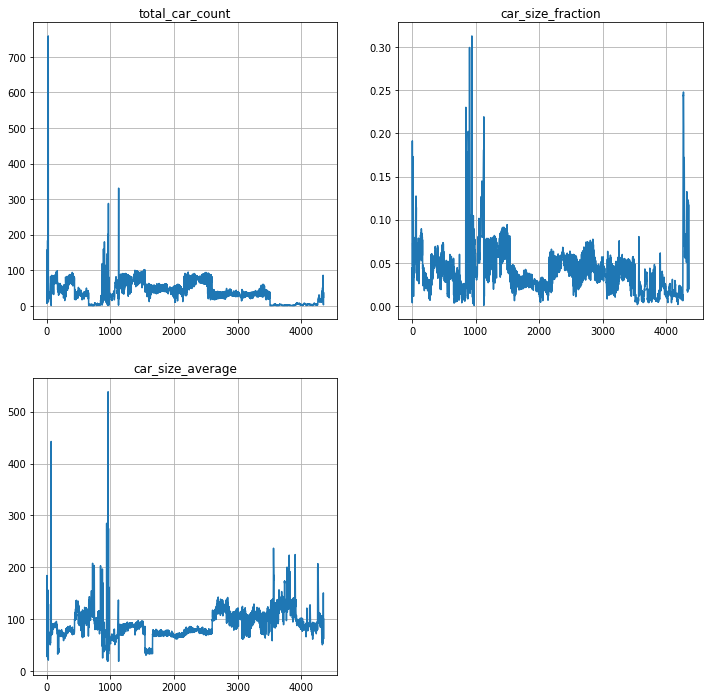

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.title("total_car_count")
plt.plot(range(len(trainval_ids)), detail_info["total_car_count"])
plt.grid(True)

plt.subplot(222)
plt.title("car_size_fraction")
plt.plot(range(len(trainval_ids)), detail_info["car_size_fraction"])
plt.grid(True)

plt.subplot(223)
plt.title("car_size_average")
plt.plot(range(len(trainval_ids)), detail_info["car_size_average"])
plt.grid(True)
plt.savefig("dataset_analysisi_detail.png")
plt.show()

In [42]:
to_oversampled1 = []
a = np.where(detail_info["total_car_count"] > 100)
b = np.where(detail_info["total_car_count"] < 10)
for idx in a[0].tolist()+b[0].tolist():
    to_oversampled1.append(trainval_ids[idx])
    
print(b[0].shape, a[0].shape)
print(to_oversampled1[:10])



(968,) (35,)
['00000002', '00000042', '00000045', '00000138', '00000149', '00010023', '00010029', '00010030', '00010031', '00000001']


In [46]:
to_oversampled2 = []
a = np.where(detail_info["car_size_fraction"] > 0.10)
b = np.where(detail_info["car_size_fraction"] < 0.01)
print(a[0].shape, b[0].shape)
for idx in a[0].tolist()+b[0].tolist():
    to_oversampled2.append(trainval_ids[idx])
print(len(to_oversampled2))

(114,) (326,)
440


In [45]:
to_oversampled3 = []
a = np.where(detail_info["car_size_average"] > 150)
b = np.where(detail_info["car_size_average"] < 30)
print(a[0].shape, b[0].shape)
for idx in a[0].tolist()+b[0].tolist():
    to_oversampled3.append(trainval_ids[idx])
print(len(to_oversampled3))

(94,) (10,)
104


In [48]:
to_oversampled_all = set(to_oversampled1+to_oversampled2+to_oversampled3)
print(len(to_oversampled_all))

1120


In [51]:
with open("/root/temp2.txt", "r") as f:
    lines = [line.strip() for line in f.readlines()]
    
lines = set(lines)
to_oversampled_all_filterd = to_oversampled_all-lines
print(len(to_oversampled_all_filterd))

print(to_oversampled_all_filterd)


183
{'10004032', '00010035', '00000040', '00000008', '00010034', '00000138', '00010193', '00010004', '00010197', '00010031', '10004115', '00000023', '00000136', '10004222', '10004116', '00010045', '00010183', '00000001', '00000177', '10004774', '00010207', '00010192', '00010202', '00010033', '00010208', '10004778', '00010189', '00010021', '00010181', '00010834', '00010025', '00010235', '00010036', '00010230', '00010191', '00012667', '00010179', '00010233', '00010200', '00010180', '00010199', '00012668', '00000039', '00000037', '10004618', '00010231', '10004018', '00010201', '10004017', '00010026', '10004830', '00000002', '10004057', '00010190', '00000033', '10004096', '00010229', '00010029', '00010232', '00010750', '00010228', '00010240', '00000041', '10004114', '00000004', '00000174', '00000028', '10004015', '00010028', '00010234', '00010188', '10004046', '10004331', '00000176', '00010194', '10004113', '00000034', '00000035', '10004148', '00010018', '00010014', '10004780', '00000140',

In [56]:
with open("/root/temp3.txt", "r") as f:
    important_samples = [line.strip().split()[-1].split(".")[0] for line in f.readlines()]
important_samples = set(important_samples)

to_oversampled_all_final = to_oversampled_all_filterd|important_samples
len(to_oversampled_all_final)

246

In [59]:
all_imageids = set(trainval_ids)
others_imageids = all_imageids-to_oversampled_all_final-lines
len(others_imageids)

3172

In [65]:
import random
easy_samples = random.sample(list(lines), int(len(lines)*0.1))
mid_samples = random.sample(list(others_imageids), int(len(others_imageids)*0.5))
hard_samples = list(to_oversampled_all_final)*5

resampled_samples = easy_samples+mid_samples+hard_samples
print(len(resampled_samples))
with open("/mnt/nfs/hangkongbei/voc-style/ImageSets/Main/resampled_imageids.txt", "w") as f:
    for sample in resampled_samples:
        f.write(sample+"\n")

2909


In [66]:
with open("/mnt/nfs/hangkongbei/voc-style/split_dataset_new/ImageSets/Main/trainval.txt", "r") as f:
    split_ids = [line.strip() for line in f.readlines()]

outfile = open("/mnt/nfs/hangkongbei/voc-style/split_dataset_new/ImageSets/Main/trainval_resampled.txt", "w")
resampled_samples_set = set(resampled_samples)
for line in split_ids:
    imageid = line.split("_")[0]
    if imageid in resampled_samples_set:
        outfile.write(line+"\n")
outfile.close()


171483
[  2.44948974  25.41576822  48.38204669  71.34832516  94.31460364
 117.28088211 140.24716058 163.21343906 186.17971753 209.145996
 232.11227448 255.07855295 278.04483142 301.0111099  323.97738837
 346.94366684 369.90994532 392.87622379 415.84250226 438.80878074
 461.77505921 484.74133768 507.70761616 530.67389463 553.6401731
 576.60645158]
Rectangle(xy=(2.44949, 0), width=22.9663, height=0.000415151, angle=0)


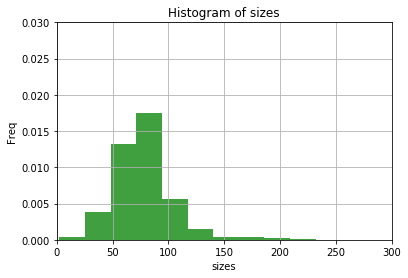

In [69]:
print(len(sizes))
sorted_sizes = sorted(sizes)
sqrt_sizes = np.sqrt(sizes)

import matplotlib.pyplot as plt

n, bins, patches = plt.hist(sqrt_sizes, 25, density=True, facecolor='g', alpha=0.75)
print(bins)
print(patches[0])
plt.xlabel('sizes')
plt.ylabel('Freq')
plt.title('Histogram of sizes')
plt.axis([0, 300, 0, 0.03])
plt.grid(True)
plt.savefig("his_sizes.png")
plt.show()

In [4]:
#获得测试集图像的宽高分布
from PIL import Image
import os
import os.path as osp
from tqdm import tqdm

image_dir = "/root/datasets/testset/JPEGImages"
val_set_path = "/root/datasets/testset/ImageSets/Main/test.txt"

with open(val_set_path, "r") as f:
    image_paths = [osp.join(image_dir, file.strip()+".jpg") for file in f.readlines()]
    
image_paths[:5]

whs = {}

for image in tqdm(image_paths):
    w, h = Image.open(image).size
    if (w,h) in whs:
        whs[(w,h)] += 1
    else:
        whs[(w,h)] = 1

print(whs)

100%|██████████| 2238/2238 [00:19<00:00, 112.59it/s]


{(4096, 2160): 2088, (3840, 2160): 118, (3840, 1641): 26, (1920, 1080): 1, (3659, 2059): 1, (1600, 900): 1, (1800, 1200): 1, (4000, 2250): 2}
